## 1.0 Libraries

In [1]:
# libraries for data
import pandas as pd
import numpy as np

# libraries for data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# library for wordcloud and image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# library for json
import json

# library for os
import os

# library for datetime
import datetime as dt

#os.getcwd()

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

----
## 1.1 Data

In [2]:
dat = pd.read_csv("CAvideos.csv")

# Info about the data
dat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


There are 16 columns with 40881 rows.

In [59]:
# Info about the data
dat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


Preview of the first 5 rows of the dataset

### 1.1.1 Missing Data

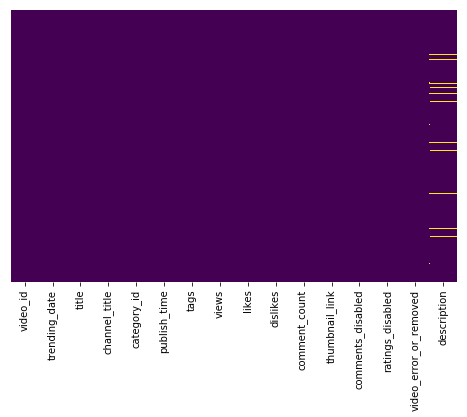

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(dat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see that a few rows of the `description` column has missing data.

----
## 1.2 EDA

### 1.2.1 Adding categories column

In [4]:
# read json file for category names
with open('CA_category_id.json', 'r') as f:
    data = json.load(f)

# create a dictionary to map 'category_id' as 'category'
dic_cat = {}
for category in data['items']:
    dic_cat[category['id']] = category['snippet']['title']
dic_cat

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

Since `category_id` column contains a list of integers, we convert them into strings to map the `categories` column.

In [5]:
dat['category_id'] = dat['category_id'].astype(str)
dat.insert(4, 'categories', dat['category_id'].map(dic_cat))
dat.head()[['categories', 'category_id']]

,categories,category_id
0,Music,10
1,Comedy,23
2,Comedy,23
3,Entertainment,24
4,Music,10


Preview of the first 5 rows of the `categories` and the `category_id` column.

### Top 10 Most Views

In [8]:
# top 10 most views
top10_views = dat[['views', 'title', 'likes', 'dislikes', 'comment_count', 'publish_time', 'trending_date', 'category_id', 'categories']].sort_values(ascending=False, by=['views'])
top10_views = top10_views.drop_duplicates(subset="title", keep='first')
top10_views = top10_views.head(10)
top10_views[['views', 'title']].head(10)

,views,title
5900,137843120,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
34361,98938809,Childish Gambino - This Is America (Official V...
4699,89930713,Marvel Studios' Avengers: Infinity War Officia...
36453,80738011,BTS (방탄소년단) 'FAKE LOVE' Official MV
22029,61163906,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...
1712,56843038,"Luis Fonsi, Demi Lovato - Échame La Culpa"
31796,53071887,VENOM - Official Trailer (HD)
17237,51243149,To Our Daughter
39208,47778378,Maroon 5 - Girls Like You ft. Cardi B
20055,47362934,Drake - God’s Plan


- List of top 10 Youtube videos with the most views.
- We see that 'YouTube Rewind: The Shape of 2017' had the most views.

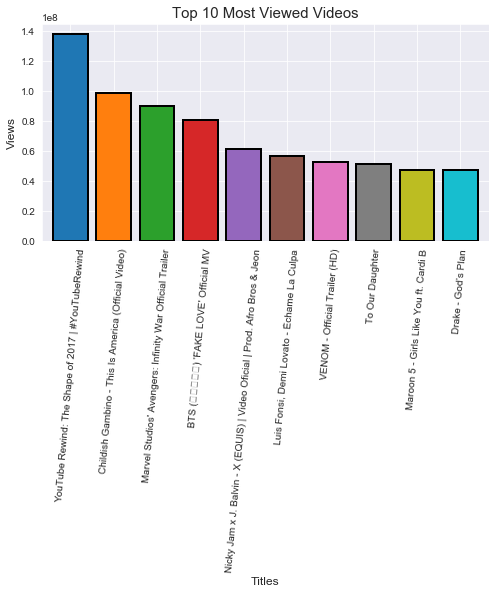

In [132]:
# Label list
label = list(top10_views['title'])

# Plot data
ax = top10_views.plot.bar(x='title', y='views', rot=85, edgecolor='black',
                         linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels / title / legend
ax.set_ylabel("Views", size=12)
ax.set_xlabel("Titles", size=12)
ax.set_title("Top 10 Most Viewed Videos", size=15)

plt.show()

- Barplot of the top 10 mostly viewed videos on Youtube. 
- We can see that the y-axis is shown in *one hundred millions*, i.e. the most viewed video had 1.4 hundred million views. 
- We can also see that there is a relatively steady decreasing trend in the number of views from the left to the right.

### Top 10 Most Likes

In [134]:
# top 10 most likes
top10_likes = dat[['likes', 'title', 'views', 'dislikes', 'comment_count', 'publish_time', 'trending_date', 'category_id', 'categories']].sort_values(ascending=False, by=['likes'])
top10_likes = top10_likes.drop_duplicates(subset="title", keep='first')
top10_likes = top10_likes.head(10)
top10_likes[['likes','title']].head(10)

,likes,title
36453,5053338,BTS (방탄소년단) 'FAKE LOVE' Official MV
34361,3037318,Childish Gambino - This Is America (Official V...
5900,3014479,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4699,2606665,Marvel Studios' Avengers: Infinity War Officia...
2873,2542863,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
20055,2469057,Drake - God’s Plan
33633,2407419,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...
21466,2392594,j-hope 'Daydream (백일몽)' MV
30900,2195120,Ariana Grande - No Tears Left To Cry
39208,2178332,Maroon 5 - Girls Like You ft. Cardi B


- List of top 10 Youtube videos with the most likes. 
- We see that 'BTS (방탄소년단) 'FAKE LOVE' Official MV' had the most views.

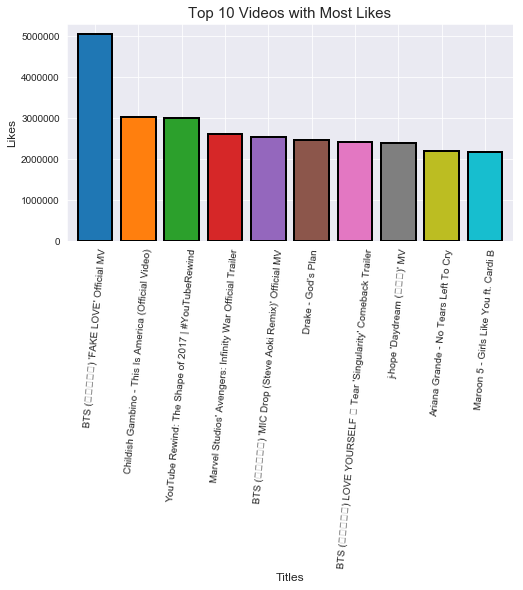

In [135]:
# Plot data
ax = top10_likes.plot.bar(x='title', y='likes', rot=85, edgecolor='black',
                         linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Likes", size=12)
ax.set_xlabel("Titles", size=12)
ax.set_title("Top 10 Videos with Most Likes", size=15)

plt.show()

- Barplot of the top 10 videos with the most likes on Youtube.
- Video wth the most likes is by 'BTS'.
- Except the video with the most likes, the rest of the videos tend to have a steady decreasing number of likes.

### Top 10 Most Dislikes

In [136]:
# top 10 most dislikes
top10_dlikes = dat[['dislikes', 'title', 'views', 'likes', 'comment_count', 'publish_time', 'trending_date', 'category_id', 'categories']].sort_values(ascending = False, by='dislikes')
top10_dlikes = top10_dlikes.drop_duplicates(subset='title', keep='first')
top10_dlikes = top10_dlikes.head(10)
top10_dlikes[['dislikes','title']].head(10)

,dislikes,title
5900,1602383,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
2898,504340,Jake Paul - It's Everyday Bro (Remix) [feat. G...
14852,461660,Suicide: Be Here Tomorrow.
305,200391,Jake Paul - Saturday Night (Song) feat. Nick C...
6686,190227,PSA from Chairman of the FCC Ajit Pai
35970,174645,Official Call of Duty®: Black Ops 4 — Multipla...
36453,165854,BTS (방탄소년단) 'FAKE LOVE' Official MV
20325,164693,Fergie Performs The U.S. National Anthem / 201...
8769,163586,Объявляем забастовку избирателей
35735,162731,Race 3 | Official Trailer | Salman Khan | Remo...


- List of top 10 Youtube videos with the most dislikes.
- We see that 'YouTube Rewind: The Shape of 2017 | #YouTubeRe...' had the most views.

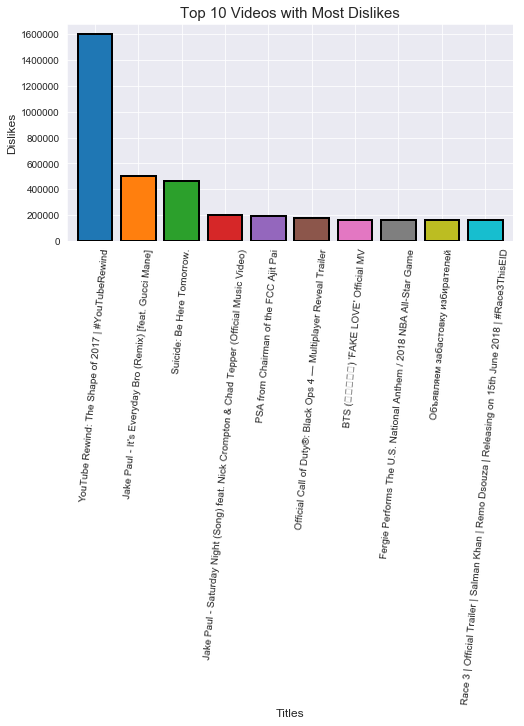

In [137]:
# Plot data
ax = top10_dlikes.plot.bar(x='title', y='dislikes', rot=85, edgecolor='black',
                         linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Dislikes", size=12)
ax.set_xlabel("Titles", size=12)
ax.set_title("Top 10 Videos with Most Dislikes", size=15)

plt.show()

- Barplot of the top 10 videos with the most dislikes on Youtube.
- Video with the most dislikes is also the video with the most views!
- We see that video with the most likes is unusually greater in the number of dislikes than the other 9 videos with the most dislikes.
- We can group the bar graphs into 3:
    - Video with the most dislikes is unusually greater than the other 9 videos.
    - 2nd and 3rd video with the most dislikes with more than 400,000 dislikes.
    - From 4th to the 10th video with the most dislikes being near 200,000 dislikes.

### Top 10 Most Comments

In [138]:
# top 10 most comments
top10_comments = dat[['comment_count', 'title', 'views','likes', 'dislikes', 'publish_time', 'trending_date', 'category_id', 'categories']].sort_values(ascending=False, by=['comment_count'])
top10_comments = top10_comments.drop_duplicates(subset='title', keep='first')
top10_comments = top10_comments.head(10)
top10_comments[['comment_count', 'title']].head(10)

,comment_count,title
36453,1114800,BTS (방탄소년단) 'FAKE LOVE' Official MV
4996,827755,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
14852,625010,Suicide: Be Here Tomorrow.
2873,519092,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
34599,445251,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...
21466,437036,j-hope 'Daydream (백일몽)' MV
29241,349112,Melting Every Lipstick From Sephora Together
4699,347982,Marvel Studios' Avengers: Infinity War Officia...
33633,340125,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...
34361,319502,Childish Gambino - This Is America (Official V...


- List of top 10 Youtube videos with the most comments.
- We see that 'BTS (방탄소년단) 'FAKE LOVE' Official MV' had the most comments.
- Note that 'BTS (방탄소년단) 'FAKE LOVE' Official MV' is also the video with the most likes!

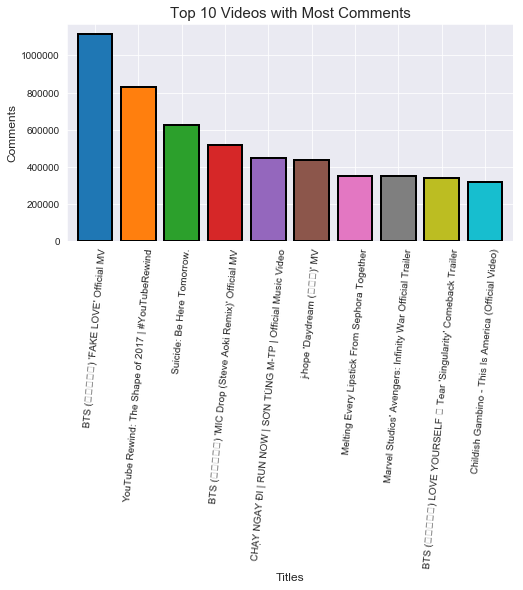

In [139]:
# Plot data
ax = top10_comments.plot.bar(x='title', y='comment_count', rot=85, edgecolor='black',
                         linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Comments", size=12)
ax.set_xlabel("Titles", size=12)
ax.set_title("Top 10 Videos with Most Comments", size=15)

plt.show()

- Barplot of the top 10 vidoes with the most comments on Youtube.
- There is a gradually decreasing trend from the left to the right.
- We also see that the video with the most dislikes had the second most comments, 'YouTube Rewind: The Shape of 2017 | #YouTubeRe...'.

----
### 1.2.2 Correlation Matrix and Heatmap

In [38]:
# First calculate for the correlation matrix
htmp = dat[['views', 'likes', 'dislikes', 'comment_count']]
htmp = htmp.corr()
htmp

,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


#### 1.2.2.1 Heatmap

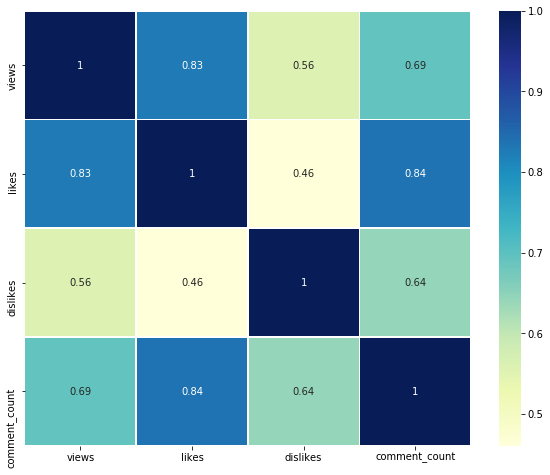

In [76]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,8))

# Plot heatmap
sns.heatmap(htmp, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.show()

- We see above that there is a **positive correlation** between all the columns ($0 < r < 1$).
    - Note that **positive correlation** means that when **one variable increases, so does the other**, or **when one variable decreases, so does the other**.
- There is a strong positive correlation between `likes` and `views` ($r=0.83$), and `likes` and `comments` ($r=0.84$).
- Lowest positive correlation exists between `likes` and `dislikes` ($r=0.46$).

----
### 1.2.3 Word Cloud
#### Word Cloud of Youtube video titles

There are a total of 2236568 words in the titles of the videos.


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


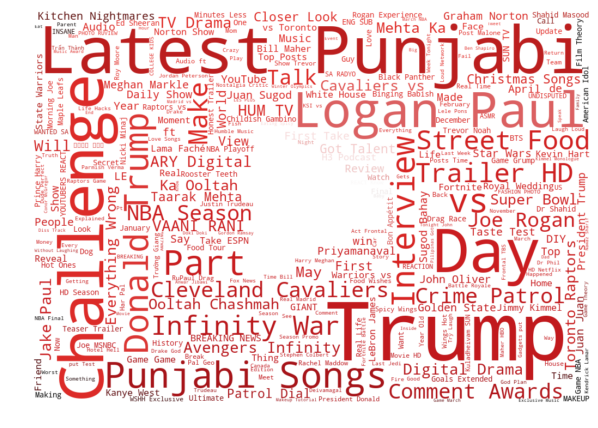

In [23]:
# combine all the titles of the videos in one string variable
text = " ".join(title for title in dat.title)
print("There are a total of {} words in the titles of the videos.".format(len(text)))

# List of words to be filtered out, i.e. 'video, official'
stopwords = set(STOPWORDS)
stopwords.update(['video', 'official', 'song', 'full', 'episode', 
                  'ep', 'highlights', 'new', 'latest punjabi', 'best', 'live'])


# Create wordcloud image and convert mask image into pixels
mask = np.array(Image.open("youtubelogo.png").convert('RGB'))
wc_youtube = WordCloud(stopwords=stopwords, background_color="white", 
                       mode="RGB", max_words=300, mask=mask).generate(text)

# Display/plot the image
colors = ImageColorGenerator(mask)
plt.subplots(figsize=(10,8))
plt.imshow(wc_youtube.recolor(color_func=colors), interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Youtube Video Titles')
plt.show();

# save img to img folder:
# wordcloud.to_file("img/word_cloud.png")

- Word cloud of Youtube video titles in the Youtube logo shape.
- Titles with the biggest presence is the videos with most presence (i.e. number of videos with the same title).
- We see that *'Trump', 'Latest Punjabi', 'Challenge', 'Logan Paul', 'Day'* are the top 5 most occuring video titles.

#### Word Cloud for tags

There are a total of 11408278 words in the tags of the videos.


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


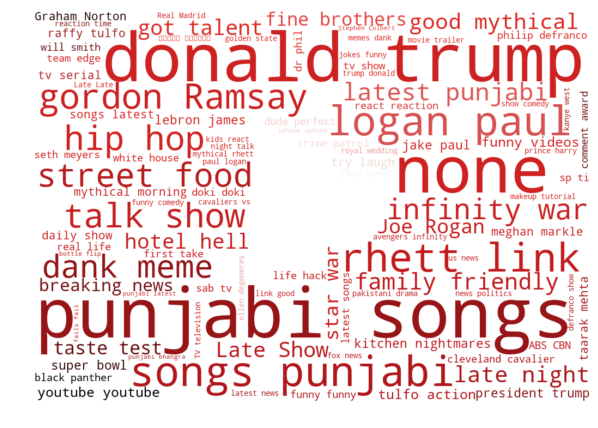

In [78]:
# combine all the tags of the videos in one string variable
text = " ".join(title for title in dat.tags)
print("There are a total of {} words in the tags of the videos.".format(len(text)))

# List of words to be filtered out, i.e. 'video, official'
stopwords = set(STOPWORDS)
stopwords.update(['video', 'official', 'song', 'full', 'episode', 
                  'ep', 'highlights', 'new', 'latest punjabi', 'best', 'live'])


# Create wordcloud image and convert mask image into pixels
mask = np.array(Image.open("youtubelogo.png").convert('RGB'))
wc_youtube = WordCloud(stopwords=stopwords, background_color="white", 
                       mode="RGB", max_words=100, mask=mask).generate(text)

# Display/plot the image
colors = ImageColorGenerator(mask)
plt.subplots(figsize=(10,8))
plt.imshow(wc_youtube.recolor(color_func=colors), interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Tags')
plt.show()

# save img to img folder:
# wordcloud.to_file("img/word_cloud.png")

- Word cloud of Youtube video tags in the Youtube logo shape.
- We see that 'punjabi songs', 'donald trump', 'none', 'songs punjabi', 'logan paul' are the top 5 most occuring tags.


----
##  1.2.4 Views by Categories

In [140]:
# Group data by 'categories'
views_by_cat = dat.groupby('categories')
cat_list = list(views_by_cat.first().index.values)

# Loop to make a list of views per category
views = []
for category in cat_list:
    views.append(views_by_cat.get_group(category)['views'].sum()) # Add up all the views

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Views": views}
data = pd.DataFrame(data).sort_values(ascending=False, by='Views')
data.head(5)

,Categories,Views
3,Entertainment,13671215509
8,Music,13179850194
1,Comedy,3708438785
10,People & Blogs,3228227926
14,Sports,2997652188


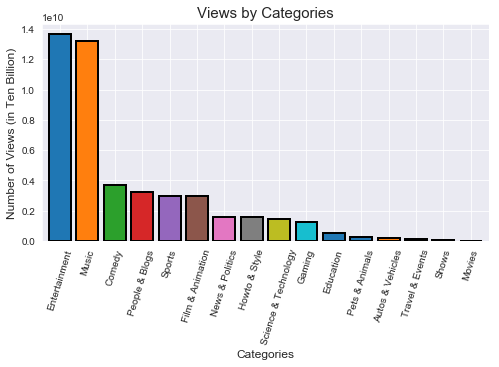

In [141]:
# Plot data
ax = data.plot.bar(x='Categories', y='Views', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Number of Views (in Ten Billion)", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Views by Categories", size=15)

plt.show()

- We see that `Entertainment` and `Music` are the two categories with the most views (Both greater than *thirteen billion* views).
- We see that `Entertainment` and `Music` are unusually greater than other categories, i.e. `Comedy`, `People & Blogs`, and etc...
- `Movies`, `Shows`, `Travel & Events` are the categories with the lowest number of views.

----
### 1.2.5 Likes by Categories

In [142]:

# Loop to make a list of likes per category
likes = []
for category in cat_list:
    likes.append(views_by_cat.get_group(category)['likes'].sum()) # Add up all the likes

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Likes": likes}
data = pd.DataFrame(data).sort_values(ascending=False, by='Likes')
data.head(5)

,Categories,Likes
8,Music,564447530
3,Entertainment,387245433
1,Comedy,196046674
10,People & Blogs,105388564
4,Film & Animation,77802003


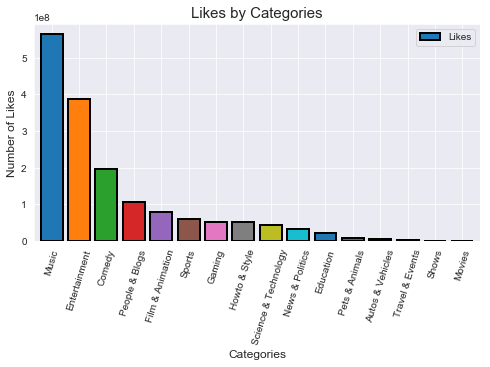

In [150]:
# Plot data
ax = data.plot.bar(x='Categories', y='Likes', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8)

# Set axis labels and title
ax.set_ylabel("Number of Likes", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Likes by Categories", size=15)

plt.show()

- We see again that `Entertainment` and `Music` are the categories with the most likes.
- However, note that this time, `Music` outnumbered `Entertainment` in terms of number of likes.
- Again, we see that `Movies` and `Shows` has the lowest likes.
    - This result is parallel to the correlation coefficient above in the heatmap above since views and likes had relatively high value ($r=0.83$).

----
### 1.2.6 Dislikes by Categories

In [152]:
# Loop to make a list of dislikes per category
dislikes = []
for category in cat_list:
    dislikes.append(views_by_cat.get_group(category)['dislikes'].sum()) # Add up all the dislikes

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Dislikes": dislikes}
data = pd.DataFrame(data).sort_values(ascending=False, by='Dislikes')
data.head(5)

,Categories,Dislikes
3,Entertainment,25791583
8,Music,22098190
10,People & Blogs,9480796
1,Comedy,5372515
14,Sports,3286369


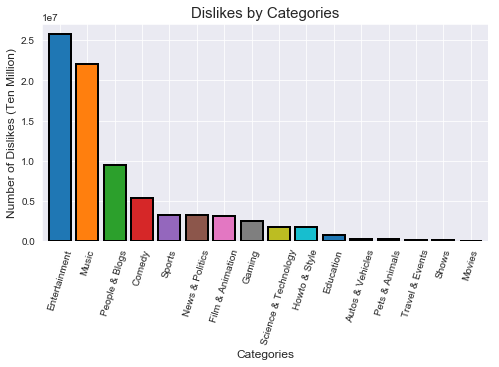

In [153]:
# Plot data
ax = data.plot.bar(x='Categories', y='Dislikes', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8, legend=None)

# Set axis labels and title
ax.set_ylabel("Number of Dislikes (Ten Million)", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Dislikes by Categories", size=15)

plt.show()

- We see again that `Entertainment` and `Music` had the most dislikes.
- `Movies` and `Shows` had the least number of dislikes.
    - Again, we can relate this result with the heatmap above, as there was a positive correlation between `views` and `dislikes` ($r=0.56$), we see that the order in which each of the categories are aligned on the graphs are similar to that of the `views` and the `dislikes`.

----
### 1.2.7 Comments by Categories

In [154]:
# Loop to make a list of likes per category
comments = []
for category in cat_list:
    comments.append(views_by_cat.get_group(category)['comment_count'].sum()) # Add up all the comments

# Make a DataFrame and sort 'views' in descending order
data = {"Categories": cat_list, "Comments": comments}
data = pd.DataFrame(data).sort_values(ascending=False, by='Comments')
data.head(5)

,Categories,Comments
3,Entertainment,55313036
8,Music,52435252
1,Comedy,19638776
10,People & Blogs,16818201
4,Film & Animation,10086573


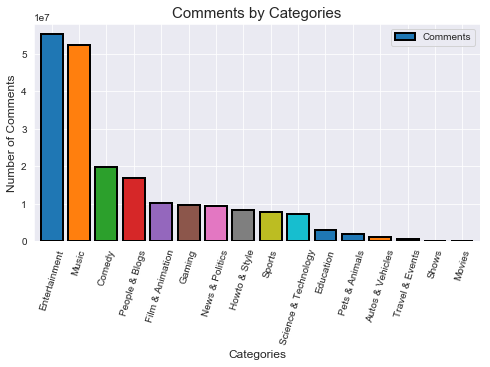

In [155]:
# Plot data
ax = data.plot.bar(x='Categories', y='Comments', rot=73, edgecolor='black', 
                   linewidth=2, align='center', figsize=(8,4), width=0.8)

# Set axis labels and title
ax.set_ylabel("Number of Comments", size=12)
ax.set_xlabel("Categories", size=12)
ax.set_title("Comments by Categories", size=15)

plt.show()

- We see again that `Entertainment` and `Music` had the most comments.
- `Entertainment` and `Music` had the most comments.
- `Shows` and `Movies` had the least comments.

----
### 1.2.8 Pie Chart of Categories

In [156]:
# Group data by 'categories'
cat_count = dat.groupby('categories')
cat_count = cat_count['categories'].count()
cat_count

categories
Autos & Vehicles          353
Comedy                   3773
Education                 991
Entertainment           13451
Film & Animation         2060
Gaming                   1344
Howto & Style            2007
Movies                      6
Music                    3731
News & Politics          4159
People & Blogs           4105
Pets & Animals            369
Science & Technology     1155
Shows                     124
Sports                   2787
Travel & Events           392
Name: categories, dtype: int64

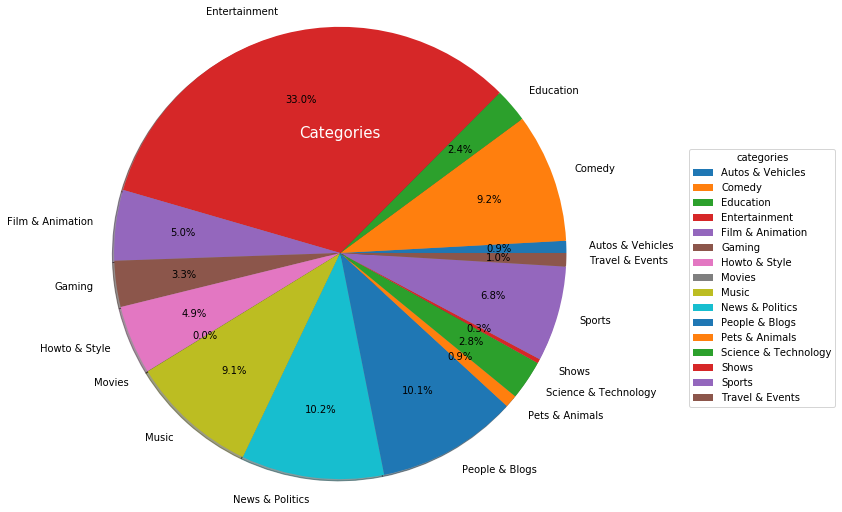

In [32]:
# Get lists of category lists and counts
# cat_list = list(cat_count.index.values)
cat_count = list(cat_count)

# Plot Pie Plot
plt.pie(cat_count, labels=cat_list, autopct='%.1f%%', pctdistance=0.7, shadow=True, radius=2.6)
plt.title("Categories", size=15, color='white')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0, 1.8, 1), title="categories")

plt.show()

- Proportion of videos in different categories.
- We see `Entertainment` had the biggest proprotion, close to a 3rd of all the videos ($33.0$%).

----
### 1.2.9 Log-Histogram of Views/Likes/Dislikes/Comments

#### 1.2.9.1 Log-Histogram

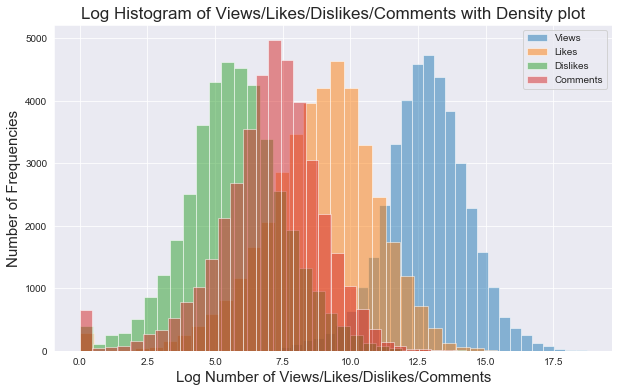

In [36]:
# Set figure size
fig, ax = plt.subplots(figsize=(10,6))

# Set theme
sns.set_style('darkgrid')

# Plot all four histograms
plt.hist(np.log(dat['views']+1), bins=30,alpha=0.5)
plt.hist(np.log(dat['likes']+1), bins=30,alpha=0.5)
plt.hist(np.log(dat['dislikes']+1), bins=30,alpha=0.5)
plt.hist(np.log(dat['comment_count']+1), bins=30,alpha=0.5)

# Grid/Labels/Title/Legend
plt.xlabel('Log Number of Views/Likes/Dislikes/Comments', size=15)
plt.ylabel('Number of Frequencies', size=15)
plt.title('Log Histogram of Views/Likes/Dislikes/Comments with Density plot', size=17)
plt.legend(['Views','Likes','Dislikes','Comments'])

plt.show()

- Because the number of `views` greatly outweighs those of `likes/dislikes/comments`, we take the log of the number of `views/likes/dislikes/comments` to compare them together.
- We see that histogram of `views/likes/dislikes/comments` looks normal, i.e.bell-shaped curves.
- Mean value of `views` is the greatest, while the mean values of `dislikes` is the lowest.

### 1.2.10 KDE Density plot of Views/Likes/Dislikes/Comments

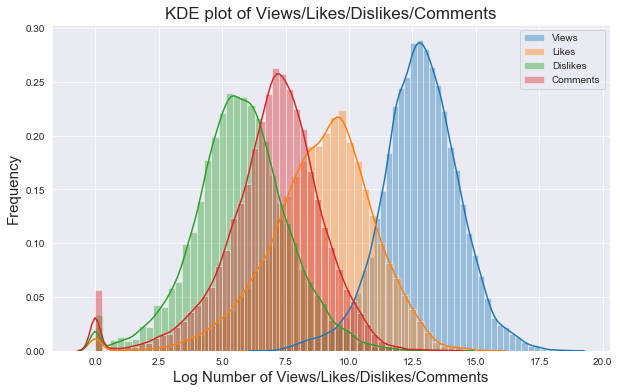

In [332]:
# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))

# Plot all four data
sns.distplot(np.log(dat['views']+1))
sns.distplot(np.log(dat['likes']+1))
sns.distplot(np.log(dat['dislikes']+1))
sns.distplot(np.log(dat['comment_count']+1))

# Add legend/labels/title
plt.legend(['Views','Likes','Dislikes','Comments'])
plt.xlabel('Log Number of Views/Likes/Dislikes/Comments', size=15)
plt.ylabel('Frequency', size=15)
plt.title('KDE plot of Views/Likes/Dislikes/Comments', size=17)

plt.show()

- KDE density plot of `views/likes/dislikes/comments`.
- Based on the curve outside the histogram, we see that the curve is normal, i.e. bell-shaped.

### 1.2.11 Scatterplot Comparison of Views/Likes/Dislikes/Comments with Regression Lines

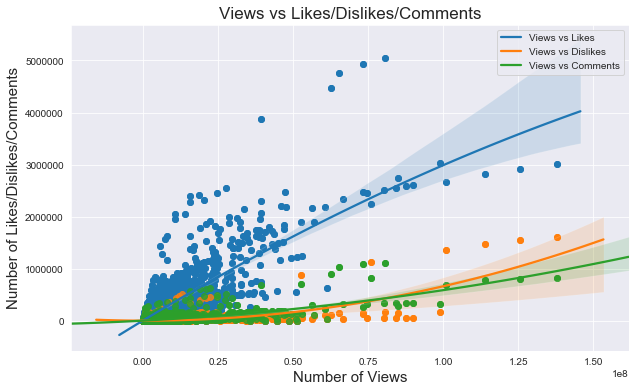

In [14]:
# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')

# Plot Scatter Plots
plt.scatter(dat['views'], dat['likes'])
plt.scatter(dat['views'], dat['dislikes'])
plt.scatter(dat['views'], dat['comment_count'])

# Regression plot
sns.regplot(x=dat['views'], y=dat['likes'], fit_reg=True, order=2)
sns.regplot(x=dat['views'], y=dat['dislikes'], fit_reg=True, order=2)
sns.regplot(x=dat['views'], y=dat['comment_count'], fit_reg=True, order=2)

# Legend/Axis labels/Title
plt.legend(['Views vs Likes', 'Views vs Dislikes', 'Views vs Comments'])
plt.title('Views vs Likes/Dislikes/Comments', size=17)
plt.xlabel('Number of Views', size=15)
plt.ylabel('Number of Likes/Dislikes/Comments', size=15)

plt.show()

`Views` vs `Likes`:
- There is a *fanning-out* effect on the scatter plot. 
- Regression line is *non-linear* and rather a *power regression* line.
- Number of `views` increase much faster than that of `likes`.


`Views` vs `Dislikes`: 
- Regression line is *non-linear* and rather an *exponential* line.
- Number of `views` increase slower than that of `dislikes`.

`Views` vs `Comments`:
- Regression line is *non-linear* and rather *exponential* line.
- Number of `views` increase slower than that of `comments`.

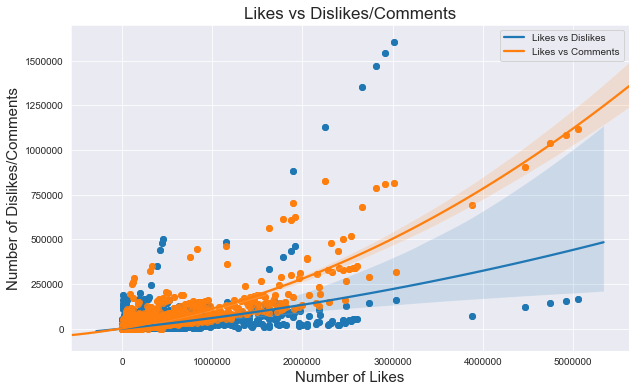

In [22]:
# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')

# Plot Scatter Plots
# plt.scatter(dat['likes'], dat['views'])
plt.scatter(dat['likes'], dat['dislikes'])
plt.scatter(dat['likes'], dat['comment_count'])

# Regression plot
sns.regplot(x=dat['likes'], y=dat['dislikes'], fit_reg=True, order=2)
sns.regplot(x=dat['likes'], y=dat['comment_count'], fit_reg=True, order=2)

# Legend/Axis labels/Title
plt.legend(['Likes vs Dislikes', 'Likes vs Comments'])
plt.title('Likes vs Dislikes/Comments', size=17)
plt.xlabel('Number of Likes', size=15)
plt.ylabel('Number of Dislikes/Comments', size=15)
plt.show()

**Note:** Rule out `views` since the number of `views` are significantly greater than `likes`/`dislikes`/`comments`, this makes it harder to see the relationship between just `likes` vs `dislikes`/`comments`.

`Views` vs `Disikes`:
- Regression line is *non-linear* and rather an *exponential regression* line.
- Number of `likes` increase much slower than that of `dislikes`.

`Likes` vs `Comments`: 
- Regression line is *non-linear* and rather an *exponential* line.
- Number of `likes` increase slower than that of `comments`.

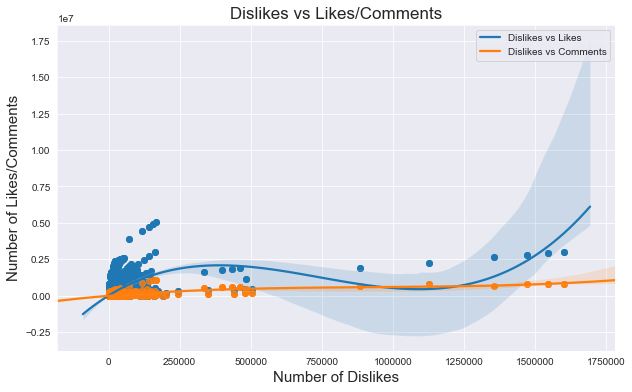

In [24]:
# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')

# Plot Scatter Plots
# plt.scatter(dat['dislikes'], dat['views'])
plt.scatter(dat['dislikes'], dat['likes'])
plt.scatter(dat['dislikes'], dat['comment_count'])

# Regression plot
sns.regplot(x=dat['dislikes'], y=dat['likes'], fit_reg=True, order=3)
sns.regplot(x=dat['dislikes'], y=dat['comment_count'], fit_reg=True, order=3)

# Legend/Axis labels/Title
plt.legend(['Dislikes vs Likes', 'Dislikes vs Comments'])
plt.title('Dislikes vs Likes/Comments', size=17)
plt.xlabel('Number of Dislikes', size=15)
plt.ylabel('Number of Likes/Comments', size=15)
plt.show()

**Note:** Again, rule out `views` for same reason.

`Dislikes` vs `Likes`:
- Regression line is *non-linear* and rather an *logistic regression* line (inverse).
- As the number of `likes` increases, the number of `dislikes` levels off.

`Dislikes` vs `Comments`: 
- Regression line looks somewhat linear.
- Number of `dislikes` increase faster than that of `comments`.

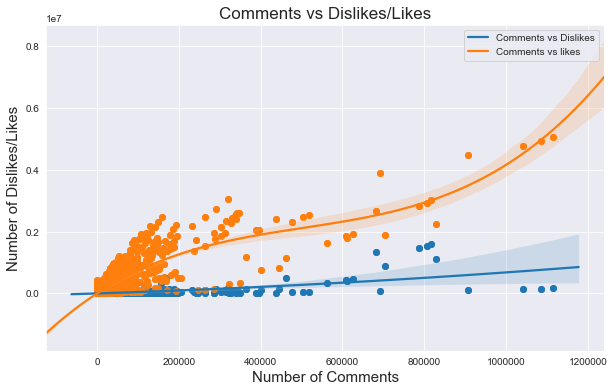

In [25]:
# Set figure size and theme
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('darkgrid')

# Plot Scatter Plots
# plt.scatter(dat['comment_count'], dat['views'])
plt.scatter(dat['comment_count'], dat['dislikes'])
plt.scatter(dat['comment_count'], dat['likes'])

# Regression plot
sns.regplot(x=dat['comment_count'], y=dat['dislikes'], fit_reg=True, order=2)
sns.regplot(x=dat['comment_count'], y=dat['likes'], fit_reg=True, order=3)

# Legend/Axis labels/Title
plt.legend(['Comments vs Dislikes', 'Comments vs likes'])
plt.title('Comments vs Dislikes/Likes', size=17)
plt.xlabel('Number of Comments', size=15)
plt.ylabel('Number of Dislikes/Likes', size=15)
plt.show()

**Note:** Rule out `views`.

`Comments` vs `Dislikes`:
- Regression line is *non-linear* and rather an *logistic regression* line (inverse).
- As the number of `dislikes` increases, the number of `comments` levels off.

`Comments` vs `Likes`: 
- Regression line is *non-linear* and rather an *exponential* line.
- Number of `comments` increase slower than that of `likes`.

### 1.2.12 Pairplot

In [82]:
new_dat = dat.drop(labels=['thumbnail_link','video_id','trending_date','title','channel_title','publish_time',
                          'tags','description','categories'],axis=1).astype(int)
cmt_disabled = new_dat[new_dat.columns[:6]]

,category_id,views,likes,dislikes,comment_count,comments_disabled
0,10,17158579,787425,43420,125882,0
1,23,1014651,127794,1688,13030,0
2,23,3191434,146035,5339,8181,0
3,24,2095828,132239,1989,17518,0
4,10,33523622,1634130,21082,85067,0


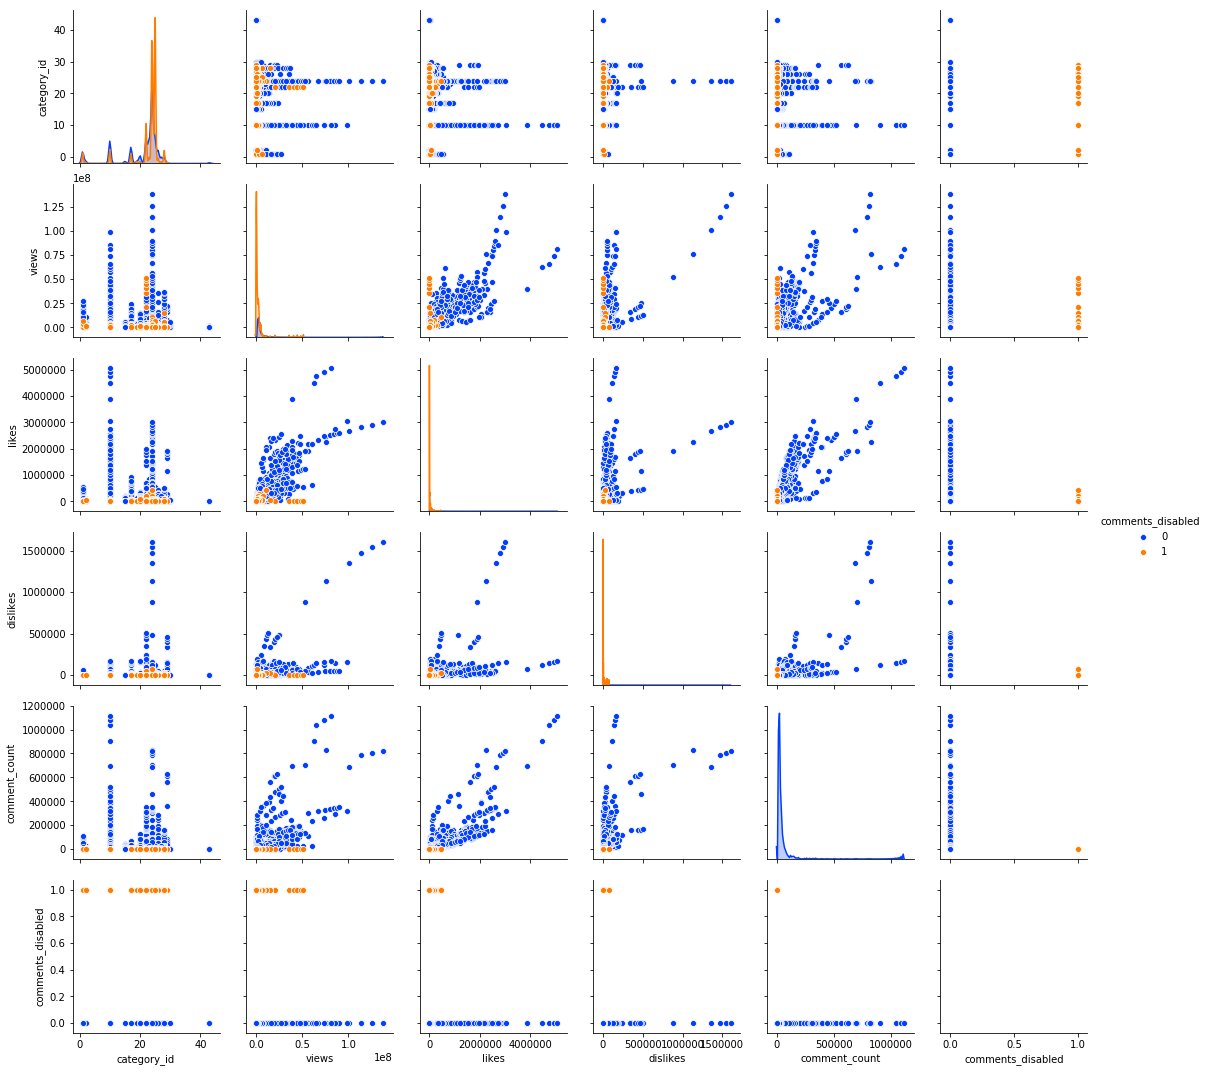

In [96]:
sns.pairplot(cmt_disabled,hue='comments_disabled',palette='bright')

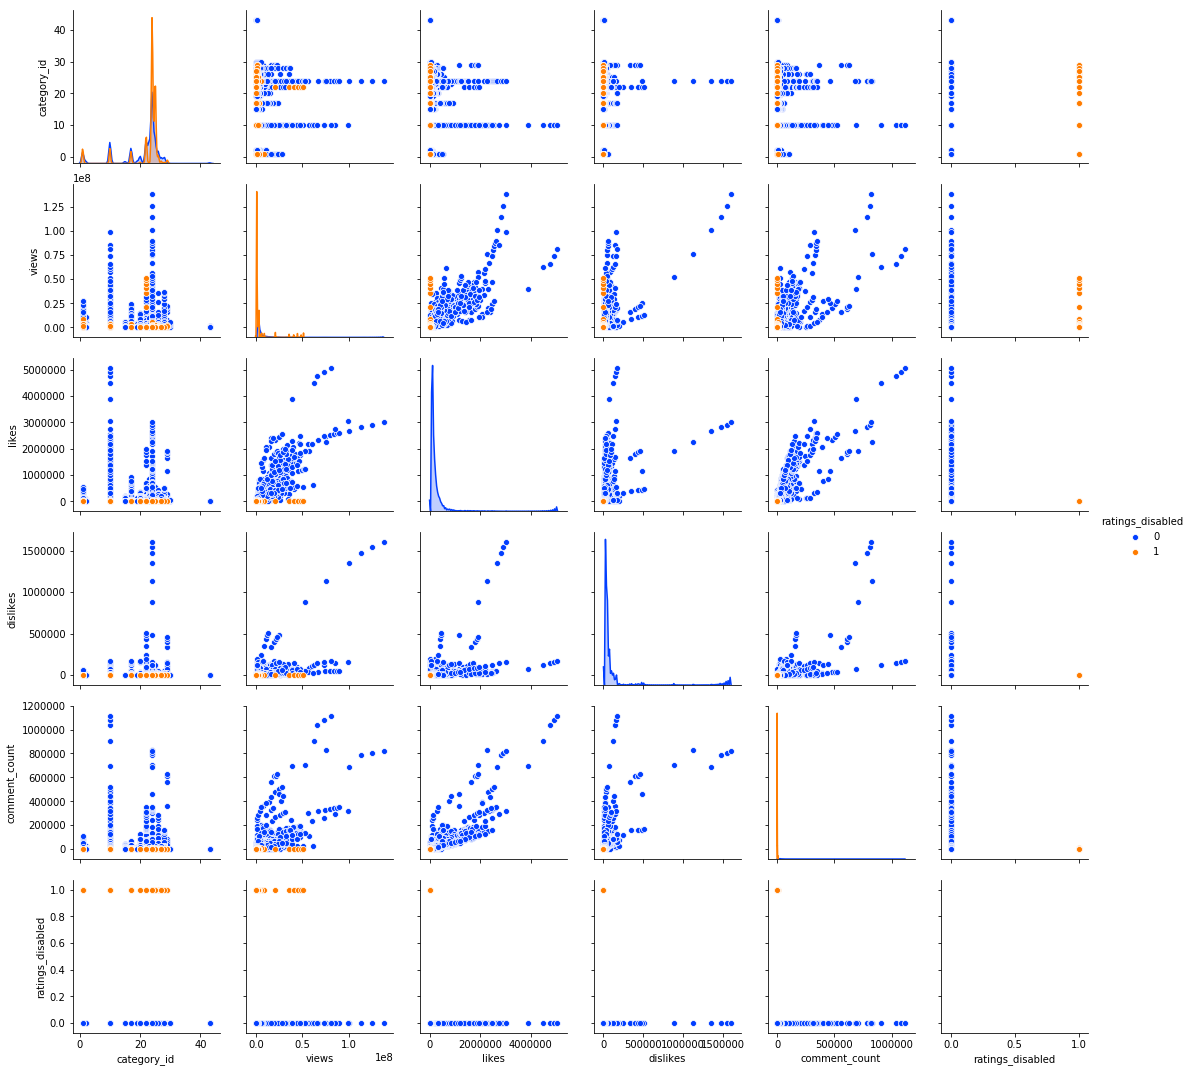

In [95]:
rat_disabled = new_dat.drop(labels=['comments_disabled','video_error_or_removed'],axis=1)
sns.pairplot(rat_disabled,hue='ratings_disabled',palette='bright')

In [25]:
com_disabled = pd.get_dummies(df['comments_disabled'],drop_first=True,prefix='Comments Disabled')
rat_disabled = pd.get_dummies(df['ratings_disabled'],drop_first=True,prefix='Ratings Disabled')

#### Add to the dataset

In [26]:
df = pd.concat([df,com_disabled,rat_disabled],axis=1)
df = df.drop(['comments_disabled','ratings_disabled','video_error_or_removed','tags','trending_date'],axis=1)
df.head(3)

,title,channel_title,category_id,views,likes,dislikes,comment_count,Comments Disabled_True,Ratings Disabled_True
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,0,0
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,0,0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,0,0


Top 10 Channels with the most `views`

In [27]:
df[['channel_title','views']].groupby('channel_title',axis=0).sum().sort_values(by='views',ascending=False).head(10)

,views
channel_title,
Marvel Entertainment,1011420205
T-Series,799114025
Dude Perfect,729916338
YouTube Spotlight,635976769
ibighit,511567918
PewDiePie,461700524
Sony Pictures Entertainment,451188760
Speed Records,426604974
20th Century Fox,419577035


Top 10 Channels with the most `likes`

In [28]:
df[['channel_title','likes']].groupby('channel_title',axis=0).sum().sort_values(by='likes',ascending=False).head(10)

,likes
channel_title,
ibighit,50259874
PewDiePie,33596931
Marvel Entertainment,32892782
Dude Perfect,28298398
Logan Paul Vlogs,19592343
Ed Sheeran,18483506
TaylorSwiftVEVO,18271131
EminemVEVO,18160439
YouTube Spotlight,16879595


Top 10 Channels with the most `dislikes`

In [29]:
df[['channel_title','dislikes']].groupby('channel_title',axis=0).sum().sort_values(by='dislikes',ascending=False).head(10)

,dislikes
channel_title,
YouTube Spotlight,8898520
Jake Paul,4625402
Logan Paul Vlogs,2453896
T-Series,1067612
TaylorSwiftVEVO,962785
ibighit,912931
MLG Highlights,904889
PewDiePie,902236
WORLDSTARHIPHOP,753696


Top 10 Channels with the most `Comment_count`

In [30]:
df[['channel_title','comment_count']].groupby('channel_title',axis=0).sum().sort_values(by='comment_count',ascending=False).head(10)

,comment_count
channel_title,
ibighit,9156753
YouTube Spotlight,5406288
Logan Paul Vlogs,4318383
Marvel Entertainment,4123846
PewDiePie,3869088
Jake Paul,3000741
Dude Perfect,2096231
The Game Theorists,2007590
Philip DeFranco,1958231


We see that the "YouTube Spotlight" channel appears everywhere on the top10 list. We also note that this channel is a channel created by YouTube. We are only interested in videos uploaded by users other than the creator, i.e. YouTube, so we will go ahead and get rid of all the videos uploaded by "YouTube Spotlight" channel.

**Videos uploaded by "YouTube Spotlight":**

In [31]:
youtube = df[df['channel_title']=='YouTube Spotlight']
youtube

,title,channel_title,category_id,views,likes,dislikes,comment_count,Comments Disabled_True,Ratings Disabled_True
4306,Get Ready for YouTube Rewind 2017 | #RewindisC...,YouTube Spotlight,24,144795,10948,1063,2880,0,0
4564,Get Ready for YouTube Rewind 2017 | #RewindisC...,YouTube Spotlight,24,249635,14133,1394,4031,0,0
4597,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,24784863,1149214,483943,461970,0,0
4795,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,52611730,1891822,884963,702784,0,0
4996,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,75969469,2251826,1127811,827755,0,0
5197,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,100911567,2656678,1353655,682890,0,0
5398,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,113876217,2811217,1470387,787174,0,0
5623,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,125431369,2912715,1545018,807558,0,0
5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,137843120,3014479,1602383,817582,0,0
39495,#ProudToCreate: Pride 2018,YouTube Spotlight,24,597669,29781,71617,55110,0,0


In [32]:
df = df[df['channel_title'] !='YouTube Spotlight']

In [33]:
df.head(3)

,title,channel_title,category_id,views,likes,dislikes,comment_count,Comments Disabled_True,Ratings Disabled_True
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,0,0
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,0,0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,0,0


### 1.3.1 Linear Regression: How can we predict the number of `views`?

**Question:** How can we predict the number of `views` from the number of `likes`,`dislikes`,`comments`?

We can build a *Linear Regression Model* to predict the number of `views` from the number of `likes`, `dislikes` and `comments`.

In [34]:
from sklearn.model_selection import train_test_split

#### Splitting Data

In [35]:
X = df[['likes','dislikes','comment_count']]
y = df['views']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### Initialize model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

#### Train model on the training data

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Coefficients

In [40]:
coef = pd.DataFrame(data=lm.coef_,columns=['Coefficients'],index=['likes','dislikes','comments'])
coef

,Coefficients
likes,25.041582
dislikes,54.109700
comments,-50.018793


**Interpretation of the coefficients:**
 - Holding all the other features, i.e. `dislikes`, `comments`, 1 unit increase in the **number of likes** is associated with an **increase of approximately 25 views**.
 - Similarly, holding all the other features, i.e. `likes`, `comments`, 1 unit increase in the **number of dislikes** is associated with an **increase of approximately 54 views**.
 - Lastly, holding all the other features, i.e. `likes`, `dislikes`, 1 unit increase in the **number of comments** is associated with a **decrease of approximately 50 views**.
 
This is very interesting! It is more likely that a video with more `dislikes` will have higher number of `views` than a video with more `likes`! Moreover, it is likely that commenting on videos will result in a decrease in the number of `views`!

#### Predicting Test Data and Scatterplot

In [41]:
predictions = lm.predict(X_test)

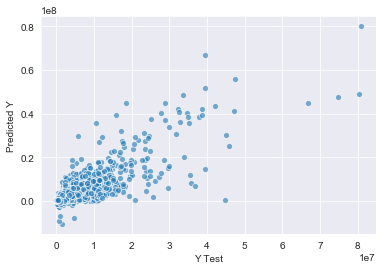

In [44]:
sns.set_style('darkgrid')
plt.scatter(y_test,predictions,alpha=0.6,edgecolors='white')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

#### Model Evaluation

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,predictions)

0.7015375486036816

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 621703.8205570038
MSE: 2702734304275.9194
RMSE: 1643999.484268751


In [48]:
metrics.explained_variance_score(y_test,predictions)

0.7016578073736512

- We see that our model explains about 70% of our variance

#### Residuals

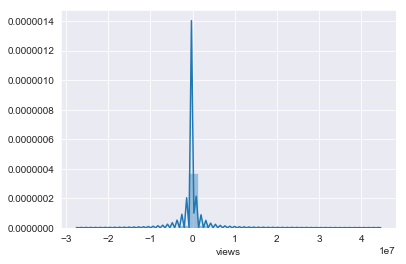

In [316]:
sns.distplot((y_test-predictions),bins=30);

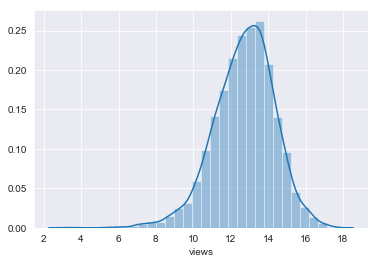

In [317]:
sns.distplot((np.log(y_test-predictions)),bins=30);

In [190]:
new_dat[new_dat.columns[:5]].head()

NameError: name 'new_dat' is not defined

In [325]:
df.head(4)

,title,channel_title,categories,category_id,views,likes,dislikes,comment_count,Comments Disabled_True,Ratings Disabled_True
0,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,17158579,787425,43420,125882,0,0
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,1014651,127794,1688,13030,0,0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,3191434,146035,5339,8181,0,0
3,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2095828,132239,1989,17518,0,0


In [344]:
X = df[['likes','dislikes']]
y = df['Comments Disabled_True']

In [354]:
y.value_counts()

0    40285
1      583
Name: Comments Disabled_True, dtype: int64

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [346]:
from sklearn.linear_model import LogisticRegression

In [347]:
# initialize
logmodel = LogisticRegression()

In [348]:
# fitting
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [349]:
# predict
pred = logmodel.predict(X_test)

In [350]:
from sklearn.metrics import classification_report,confusion_matrix

In [351]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13304
           1       0.00      0.00      0.00       183

   micro avg       0.99      0.99      0.99     13487
   macro avg       0.49      0.50      0.50     13487
weighted avg       0.97      0.99      0.98     13487



[[13304     0]
 [  183     0]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predict = dtree.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1023       0.00      0.00      0.00         1
        1295       0.00      0.00      0.00         0
        1392       0.00      0.00      0.00         1
        1443       0.00      0.00      0.00         0
        1464       0.00      0.00      0.00         0
        1508       0.00      0.00      0.00         1
        1626       0.00      0.00      0.00         1
        1637       0.00      0.00      0.00         0
        1683       0.00      0.00      0.00         0
        1727       0.00      0.00      0.00         1
        1728       0.00      0.00      0.00         0
        1730       0.00      0.00      0.00         1
        1780       0.00      0.00      0.00         0
        1895       0.00      0.00      0.00         0
        1941       0.00      0.00      0.00         1
        1954   